# Regression Trees and Model Optimization - Lab

## Introduction

In this lab, we'll see how to apply regression analysis using CART trees while making use of some hyperparameter tuning to improve our model. 

## Objectives

In this lab you will: 

- Perform the full process of cleaning data, tuning hyperparameters, creating visualizations, and evaluating decision tree models 
- Determine the optimal hyperparameters for a decision tree model and evaluate the performance of decision tree models

## Ames Housing dataset 

The dataset is available in the file `'ames.csv'`. 

- Import the dataset and examine its dimensions: 

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Load the Ames housing dataset 
data = pd.read_csv('ames.csv', index_col='Id')

# Print the dimensions of data
print(data.shape)

# Check out the info for the dataframe
print(data.info())

# Show the first 5 rows
print(data.head())

(1460, 80)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 1

## Identify features and target data 

In this lab, we will use using 3 predictive continuous features:

#### Features

- `LotArea`: Lot size in square feet
- `1stFlrSF`: Size of first floor in square feet
- `GrLivArea`: Above grade (ground) living area square feet

#### Target

- `SalePrice`', the sale price of the home, in dollars

- Create DataFrames for the features and the target variable as shown above 
- Inspect the contents of both the features and the target variable

In [3]:
# Features and target data
target = data['SalePrice']
features = data[['LotArea', '1stFlrSF', 'GrLivArea']]

## Inspect correlations 

- Use scatter plots to show the correlation between the chosen features and the target variable
- Comment on each scatter plot 

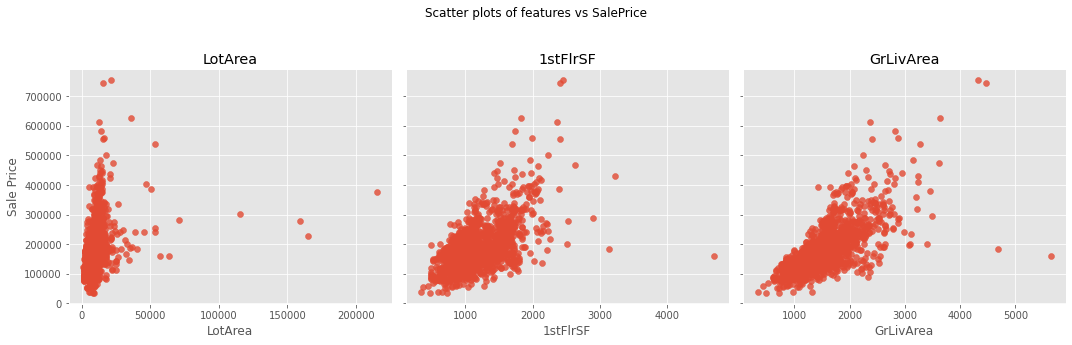

In [4]:
# Scatter plots of features vs SalePrice
fig, ax = plt.subplots(ncols=3, nrows=1, sharey=True, figsize=(15, 5))

ax[0].scatter(features['LotArea'], target, alpha=0.8)
ax[0].set_title('LotArea')
ax[0].set_xlabel('LotArea')
ax[0].set_ylabel('Sale Price')

ax[1].scatter(features['1stFlrSF'], target, alpha=0.8)
ax[1].set_title('1stFlrSF')
ax[1].set_xlabel('1stFlrSF')

ax[2].scatter(features['GrLivArea'], target, alpha=0.8)
ax[2].set_title('GrLivArea')
ax[2].set_xlabel('GrLivArea')

fig.suptitle('Scatter plots of features vs SalePrice')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Create evaluation metrics

- Import `r2_score` and `mean_squared_error` from `sklearn.metrics` 
- Create a function `performance(true, predicted)` to calculate and return both the R-squared score and Root Mean Squared Error (RMSE) for two equal-sized arrays for the given true and predicted values 
    - Depending on your version of sklearn, in order to get the RMSE score you will need to either set `squared=False` or you will need to take the square root of the output of the `mean_squared_error` function - check out [the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) or this helpful and related [StackOverflow post](https://stackoverflow.com/questions/17197492/is-there-a-library-function-for-root-mean-square-error-rmse-in-python)
    - The benefit of calculating RMSE instead of the Mean Squared Error (MSE) is that RMSE is in the same units at the target - here, this means that RMSE will be in dollars, calculating how far off in dollars our predictions are away from the actual prices for homes, on average

In [5]:
# Import metrics
from sklearn.metrics import r2_score, mean_squared_error

# Define the function
def performance(y_true, y_predict):
    """ 
    Calculates and returns the two performance scores between 
    true and predicted values - first R-Squared, then RMSE
    """

    # Calculate the r2 score between 'y_true' and 'y_predict'
    r2_score_value = r2_score(y_true, y_predict)

    # Calculate the root mean squared error between 'y_true' and 'y_predict'
    rmse_value = np.sqrt(mean_squared_error(y_true, y_predict))
    # Return the score
    return r2_score_value, rmse_value



# Test the function
score = performance([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
score

# [0.9228556485355649, 0.6870225614927066]

(0.9228556485355649, 0.6870225614927066)

## Split the data into training and test sets

- Split `features` and `target` datasets into training/test data (80/20) 
- For reproducibility, use `random_state=42`

In [6]:
from sklearn.model_selection import train_test_split 

# Split the data into training and test subsets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

## Grow a vanilla regression tree

- Import the `DecisionTreeRegressor` class
- Run a baseline model for later comparison using the datasets created above
- Generate predictions for test dataset and calculate the performance measures using the function created above 
- Use `random_state=45` for tree instance
- Record your observations

In [7]:
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Instantiate DecisionTreeRegressor 
# Set random_state=45
regressor = DecisionTreeRegressor(random_state=45)

# Fit the model to training data
regressor.fit(x_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(x_test)

# Calculate performance using the performance() function 
score = performance(y_test, y_pred)
score

# [0.5961521990414137, 55656.48543887347] - R2, RMSE

(0.5961521990414137, 55656.48543887347)

## Hyperparameter tuning (I)

- Find the best tree depth using depth range: 1-30
- Run the regressor repeatedly in a `for` loop for each depth value  
- Use `random_state=45` for reproducibility
- Calculate RMSE and r-squared for each run 
- Plot both performance measures for all runs 
- Comment on the output 

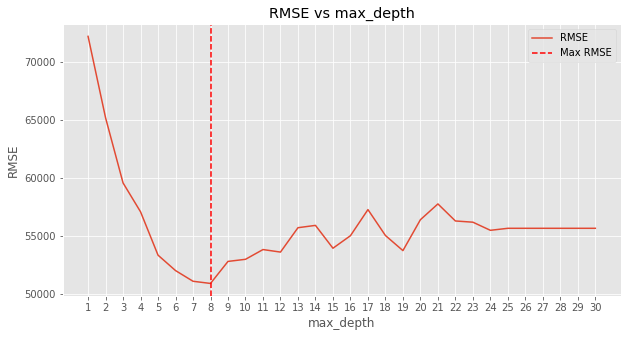

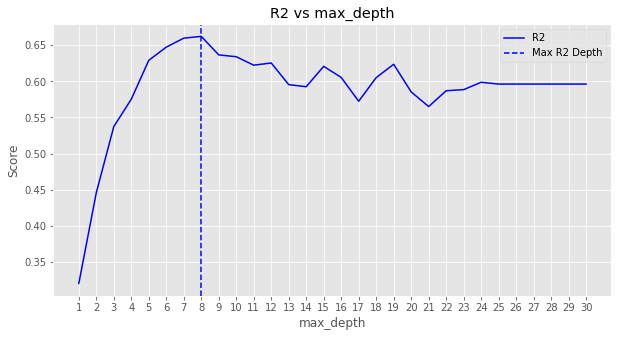

In [8]:
# Your code here 
max_depth = np.arange(1,31,1)
RMSE = []
R2 = []
for depth in max_depth:
    # Instantiate DecisionTreeRegressor 
    # Set random_state=45
    regressor = DecisionTreeRegressor(max_depth=depth, random_state=45)

    # Fit the model to training data
    regressor.fit(x_train, y_train)

    # Make predictions on the test data
    y_pred = regressor.predict(x_test)

    # Calculate performance using the performance() function 
    RMSE.append(performance(y_test, y_pred)[1])
    R2.append(performance(y_test, y_pred)[0])

# Plot the RMSE and R2 values
plt.figure(figsize=(10, 5))
plt.plot(max_depth, RMSE, label='RMSE')
# Plot a horizontal line at the highest RMSE value
plt.axvline(x=max_depth[np.argmin(RMSE)], color='red', linestyle='--', label='Max RMSE')
plt.ylabel('RMSE')
plt.xlabel('max_depth')
plt.xticks(max_depth)
plt.title('RMSE vs max_depth')
plt.legend()
plt.show()

# Plot the R2 values
plt.figure(figsize=(10, 5))
plt.plot(max_depth, R2, label='R2', color='blue')
# Plot a horizontal line at the highest R2 value
plt.axvline(x=max_depth[np.argmax(R2)], color='blue', linestyle='--', label='Max R2 Depth')
plt.xlabel('max_depth')
plt.xticks(max_depth)
plt.ylabel('Score')
plt.title('R2 vs max_depth')
plt.legend()
plt.show()

## Hyperparameter tuning (II)

- Repeat the above process for `min_samples_split` 
- Use a range of values from 2-10 for this hyperparameter 
- Use `random_state=45` for reproducibility
- Visualize the output and comment on results as above 

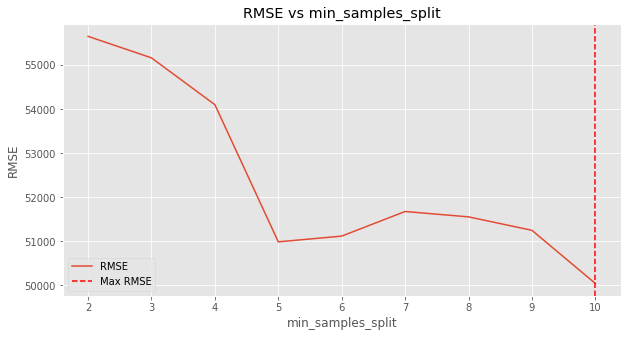

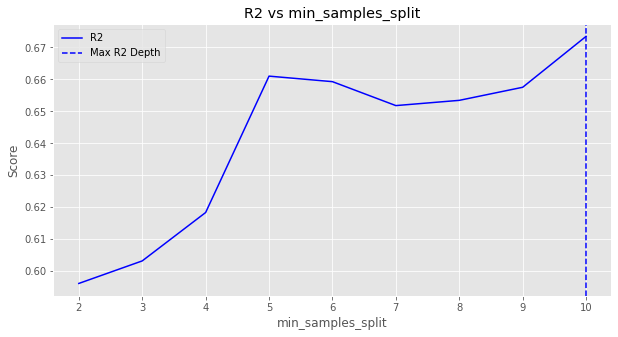

In [9]:
# Your code here 
min_samples_split = np.arange(2, 11, 1)
RMSE = []
R2 = []
for sample in min_samples_split:
    # Instantiate DecisionTreeRegressor 
    # Set random_state=45
    regressor = DecisionTreeRegressor(min_samples_split=sample, random_state=45)

    # Fit the model to training data
    regressor.fit(x_train, y_train)

    # Make predictions on the test data
    y_pred = regressor.predict(x_test)

    # Calculate performance using the performance() function 
    RMSE.append(performance(y_test, y_pred)[1])
    R2.append(performance(y_test, y_pred)[0])

# Plot the RMSE and R2 values
plt.figure(figsize=(10, 5))
plt.plot(min_samples_split, RMSE, label='RMSE')
# Plot a horizontal line at the highest RMSE value
plt.axvline(x=min_samples_split[np.argmin(RMSE)], color='red', linestyle='--', label='Max RMSE')
plt.ylabel('RMSE')
plt.xlabel('min_samples_split')
plt.xticks(min_samples_split)
plt.title('RMSE vs min_samples_split')
plt.legend()
plt.show()

# Plot the R2 values
plt.figure(figsize=(10, 5))
plt.plot(min_samples_split, R2, label='R2', color='blue')
# Plot a horizontal line at the highest R2 value
plt.axvline(x=min_samples_split[np.argmax(R2)], color='blue', linestyle='--', label='Max R2 Depth')
plt.xlabel('min_samples_split')
plt.xticks(min_samples_split)
plt.ylabel('Score')
plt.title('R2 vs min_samples_split')
plt.legend()
plt.show()

# Run the *optimized* model 

- Use the best values for `max_depth` and `min_samples_split` found in previous runs and run an optimized model with these values 
- Calculate the performance and comment on the output 

In [13]:
# Your code here 
optimized_regressor = DecisionTreeRegressor(max_depth=8, min_samples_split=10, random_state=45)
# Fit the model to training data
optimized_regressor.fit(x_train, y_train)
# Make predictions on the test data
y_pred = optimized_regressor.predict(x_test)
# Calculate performance using the performance() function
score = performance(y_test, y_pred)
print(score)

# The final RMSE and R2 values are better than the initial ones

(0.6797912086364211, 49559.11504625333)


## Level up (Optional)

- How about bringing in some more features from the original dataset which may be good predictors?
- Also, try tuning more hyperparameters like `max_features` to find a more optimal version of the model 

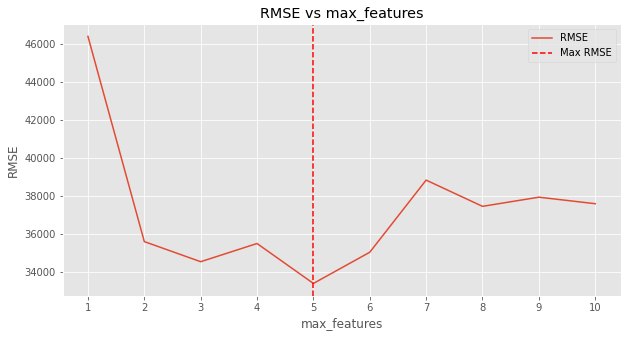

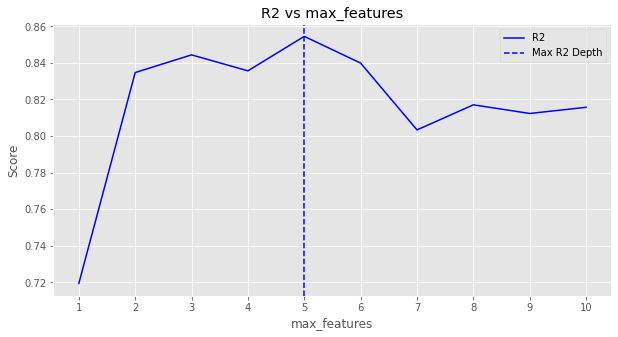

num__OverallQual          0.634371
num__GrLivArea            0.106636
num__TotalBsmtSF          0.035911
num__2ndFlrSF             0.028874
num__1stFlrSF             0.022185
num__BsmtFinSF1           0.018179
num__YearBuilt            0.018099
num__LotFrontage          0.014512
num__GarageArea           0.010536
cat__GarageType_Detchd    0.008721
dtype: float64


In [19]:
# Your code here 
# Optimizing the features
max_features = np.arange(1, 11, 1)
RMSE = []
R2 = []
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Import necessary libraries

from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Define the categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns
# Define the categorical and numerical transformers
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
# Combine the transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])
# Create a pipeline with the preprocessor and the DecisionTreeRegressor
for max_feature in max_features:
    # Instantiate the DecisionTreeRegressor
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature_selection', SelectFromModel(DecisionTreeRegressor(random_state=45),max_features=max_feature)),
        ('regressor', DecisionTreeRegressor(max_depth=8, min_samples_split=10, random_state=45))
])
    # Fit the pipeline to the training data
    pipeline.fit(X_train, y_train)
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

# Calculate performance using the performance() function
    RMSE.append(performance(y_test, y_pred)[1])
    R2.append(performance(y_test, y_pred)[0])
# Plot the RMSE values
plt.figure(figsize=(10, 5))
plt.plot(max_features, RMSE, label='RMSE')
# Plot a horizontal line at the lowest RMSE value
plt.axvline(x=max_features[np.argmin(RMSE)], color='red', linestyle='--', label='Max RMSE')
plt.ylabel('RMSE')
plt.xlabel('max_features')
plt.xticks(max_features)
plt.title('RMSE vs max_features')
plt.legend()
plt.show()

# Plot the R2 values
plt.figure(figsize=(10, 5))
plt.plot(max_features, R2, label='R2', color='blue')
# Plot a horizontal line at the highest R2 value
plt.axvline(x=max_features[np.argmax(R2)], color='blue', linestyle='--', label='Max R2 Depth')
plt.xlabel('max_features')
plt.xticks(max_features)
plt.ylabel('Score')
plt.title('R2 vs max_features')
plt.legend()
plt.show()

# Printing the important features
feature_importances = pipeline.named_steps['feature_selection'].estimator_.feature_importances_

# Get feature names after preprocessing
preprocessed_feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# Get mask of selected features
feature_mask = pipeline.named_steps['feature_selection'].get_support()

# Get the names of selected features
selected_feature_names = preprocessed_feature_names[feature_mask]

important_features = pd.Series(feature_importances[feature_mask], index=selected_feature_names)
important_features = important_features[important_features > 0]
important_features = important_features.sort_values(ascending=False)
print(important_features)

## Summary 

In this lab, we looked at applying a decision-tree-based regression analysis on the Ames Housing dataset. We saw how to train various models to find the optimal values for hyperparameters. 